# Digital Potentiometer AD5290

In [34]:
import matplotlib.pyplot as plt
import numpy as np

In [35]:
D = np.arange(256)
R_AB = 10000 # 10 kOhm
R_W = 150

In [36]:
R_WB = D / 256 * R_AB + R_W

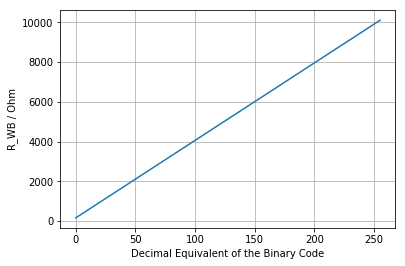

In [37]:
plt.plot(D, R_WB)
plt.grid()
plt.xlabel('Decimal Equivalent of the Binary Code')
plt.ylabel('R_WB / Ohm')
plt.show()

## Current Source PSSI2021SAY

In [38]:
I_OUT = 0.617 / R_WB + 15e-6

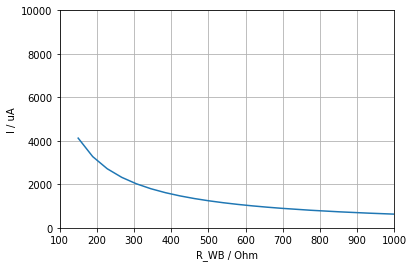

In [39]:
plt.plot(R_WB, I_OUT * 1000000)
plt.grid()
plt.xlabel('R_WB / Ohm')
plt.ylabel('I / uA')
plt.xlim(100, 1000)
plt.ylim(0, 10000)
plt.show()

## Current in dependency of decimal equivalent of the binary code

In [40]:
I_OUT = 0.617 / (D / 256 * R_AB + R_W) + 15e-6

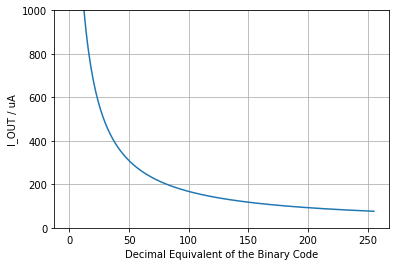

In [41]:
plt.plot(D, I_OUT * 1000000)
plt.ylim(0, 1000)
plt.ylabel('I_OUT / uA')
plt.xlabel('Decimal Equivalent of the Binary Code')
plt.grid()
plt.show()

## Calibration with 1 kOhm Resistor

In [42]:
R_calibration = 1000 # Ohm

In [43]:
U_OUT = R_calibration * I_OUT

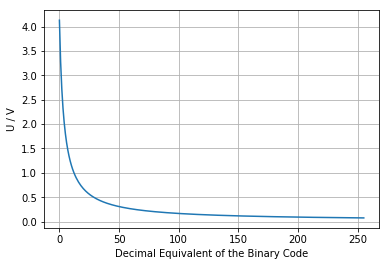

In [44]:
plt.plot(D, U_OUT)
plt.grid()
plt.ylabel('U / V')
plt.xlabel('Decimal Equivalent of the Binary Code')
plt.show()

In [45]:
import pandas as pd
import itable

In [46]:
def dec2hex(dec):
    hex_results = []
    for i in range(len(dec)): 
        hex_results.append(hex(dec[i]))
    return hex_results

In [47]:
df = pd.DataFrame({"Dec":D, "Hex":dec2hex(D), "Current / uA": np.around(I_OUT * 1000000,2), "Voltage / V": np.around(I_OUT * 1000,2)})

In [48]:
itable.PrettyTable(df)

Current / uA,Dec,Hex,Voltage / V
4128.33,0,0x0,4.13
3278.47,1,0x1,3.28
2719.66,2,0x2,2.72
2324.24,3,0x3,2.32
2029.69,4,0x4,2.03
1801.79,5,0x5,1.8
1620.2,6,0x6,1.62
1472.12,7,0x7,1.47
1349.05,8,0x8,1.35
1245.16,9,0x9,1.25
